# Week 6 - K-Means and Hierarchical Clustering

<img align="right" style="padding-right:10px;" src="figures_wk6/clustering_intro.png" width=450><br>

**FTE Overview:**
* Unsupervised machine learning
   * Different types of clustering algorithms
* K-Means
   * How the K-means works
      * K-Means algorithm to determine centroids
      * Visualize the dataset and centroids
      * Verify the algorithm labels
   * Demo: K-means with Iris dataset 
      * Split into features and labels
      * Visualize our dataset
      * Normalize our features
      * K-Means Algorithm
      * Silhouette score
      * PCA - 2d visualization of data
   * Demo: Using a scree plot (aka 'elbow' plot) to find the optimal number of clusters
      * Split into features and labels
      * Determine the optimal number of clusters for a kmeans model
      * Visualizing our clusters
* Hierarchical Cluster Analysis (HCA)
   * How HCA works
   * Measures of distance (similarity)
   * Demo: Hierarchical Clustering Analysis
      * Normalize the dataset
      * Dendrograms
* Demo: Highly dimensional data
   * Dimensionality reduction using PCA
   * T-Distributed Stochastic Neighbouring Entities (t-SNE)
* Demo:  Color Quantization using K-Means
   *Color reduction with K-Means
   *Displaying the new images

## Unsupervised machine learning
**Unsupervised machine learning** algorithms infer patterns from a dataset without reference to known, or labeled, outcomes. Unlike supervised machine learning, unsupervised machine learning methods cannot be directly applied to a regression or a classification problem because you have no idea what the values for the output data might be, making it impossible for you to train the algorithm the way you normally would. Unsupervised learning can instead be used to discover the underlying structure of the data.

One technique of unsupervised machine learning is clustering. **Clustering** allows you to automatically split the dataset into groups according to similarity. Often, however, cluster analysis overestimates the similarity between groups and doesn’t treat data points as individuals. For this reason, cluster analysis is a poor choice for applications like customer segmentation and targeting 

### Different types of clustering algorithms
Since the task of clustering is subjective, the means that can be used for achieving this goal are plenty. Every methodology follows a different set of rules for defining the ‘similarity’ among data points. In fact, there are more than 100 clustering algorithms known. But few of the algorithms are used popularly, let’s look at them in detail:

**Connectivity models:** As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.

**Centroid models:** These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

**Distribution models:** These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.

**Density Models:** These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.

We will take a closer look at two different clustering algorithms. K-Means which is an example of a centroid model and Hierarchical Clustering which is an example of a connectivity model.

## K-Means
We will be following along with [Understanding K-means Clustering in Machine Learning](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) for this section of our lecture notebook.

**K-means clustering** is one of the simplest and popular unsupervised machine learning algorithms. 

>[AndreyBu](https://www.education-ecosystem.com/andreybu/REaxr-machine-learning-model-python-sklearn-kera/oPGdP-machine-learning-model-python-sklearn-kera/), who has more than 5 years of machine learning experience and currently teaches people his skills, says that “the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

Typically, unsupervised algorithms make inferences from datasets using only input features without referring to known, or labelled, outcomes.

A cluster refers to a collection of data points aggregated together because of certain similarities.
You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the errors as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

### How the K-means works
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:
* The centroids have stabilized — there is no change in their values because the clustering has been successful.
* The defined number of iterations has been achieved.

#### Import libraries

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

#### Generate a dataset 

In [2]:
# creating two clusters of data points
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

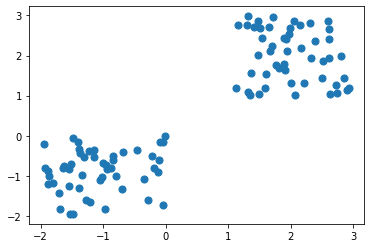

In [3]:
# plotting our dataset
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

Okay, I know our data is already "clustered" in this example.  Trust me, this will make sense in a minute!

#### K-Means algorithm to determine centroids
We will fit our dataset with the sklearn K-Mean algorithm and then determine the centroids for the two clusters.

In [4]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [5]:
# finding the centroids
Kmean.cluster_centers_

array([[-1.07568689, -0.87632162],
       [ 1.99195683,  1.99611147]])

#### Visualize the dataset and centroids

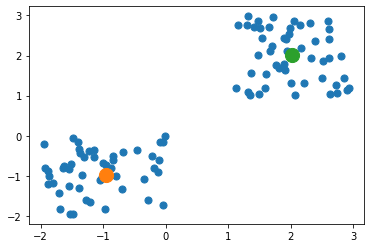

In [6]:
plt.scatter(X[ : , 0], X[ : , 1], s =50)
plt.scatter(-0.94665068, -0.97138368, s=200)
plt.scatter(2.01559419, 2.02597093, s=200)
plt.show()

Remember, a centroid is the imaginary or real location representing the center of the cluster. 


#### Verify the algorithm labels
Let's see which cluster our K-Mean algorithm predicts the point (1,-1) will belong too.

In [7]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0])

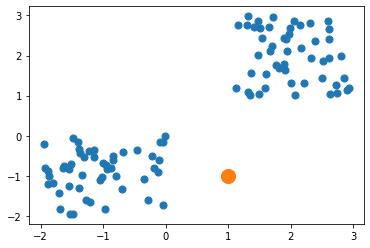

In [9]:
plt.scatter(X[ : , 0], X[ : , 1], s =50)
plt.scatter(1, -1, s=200)

plt.show()

Always happy to see when things work out!  The point (1,-1) does appear to be cluster to the lower cluster.

I know that was a very simplified example, but we will get to the more complex stuff shortly.

### Demo: K-means with Iris dataset 
This demo is based from the tutorial [Exploring the Iris dataset](https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering). I know the iris dataset is not all that exciting. However, it will be beneficial in this demo since most everyone already has a great understanding of the make-up of the data.

#### Import libraries

In [10]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

#### Load dataset

In [12]:
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# Read dataset to pandas dataframe
iris = pd.read_csv('data_wk6/iris.data', names=names) 


In [13]:
iris.head(10)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Split into features and labels
We will split our dataset into two groups. The purpose is to not use iris['species'] in the algorithm and then be able to use this column to check our model's accuracy.

In [15]:
# split data into features (X) and labels (y)
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

print(X.sample(5))
print(y.sample(5))

     sepal-length  sepal-width  petal-length  petal-width
119           6.0          2.2           5.0          1.5
30            4.8          3.1           1.6          0.2
61            5.9          3.0           4.2          1.5
20            5.4          3.4           1.7          0.2
70            5.9          3.2           4.8          1.8
46         Iris-setosa
113     Iris-virginica
51     Iris-versicolor
87     Iris-versicolor
92     Iris-versicolor
Name: species, dtype: object


<div class="alert alert-block alert-success">
    <b>Pop Quiz::</b> What does the function <b>sample</b> do in the above cell?<br>
<br>    
<b>Answer:</b><br>
    <b>sample()</b> can be used to generate a sample of random row and columns for a pandas dataframe.
    
</div>

#### Visualize our dataset
Just to be thorough, let's verify that our dataset has three species. Then let's take a look at a scatterplot comparing: <br>
* sepal-length to sepal-width
* petal-length to petal-width

In [16]:
# see how many samples we have of each species 
iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

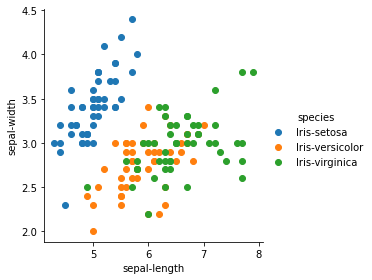

In [17]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend();

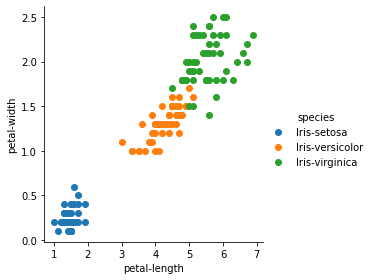

In [18]:
# do same for petals
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "petal-length", "petal-width") \
   .add_legend();

Very interesting.  Th species are nearly linearly separable based on petal size, but when we look at sepal sizes the species are more mixed.

A clustering algorithm might have a hard time realizing that there were three separate species, which we happen to know in advance - usually if you're doing exploratory data analysis (EDA), you don't know this in advance (ie: if you were looking for different groups of customers)

For this example, is might not matter too much though. The species versicolor and virginica seem to be very similar, so it might be just as well for our purposes to lump them altogether.

Let's make pair plot of our features and see if we can determine anything else about our dataset.

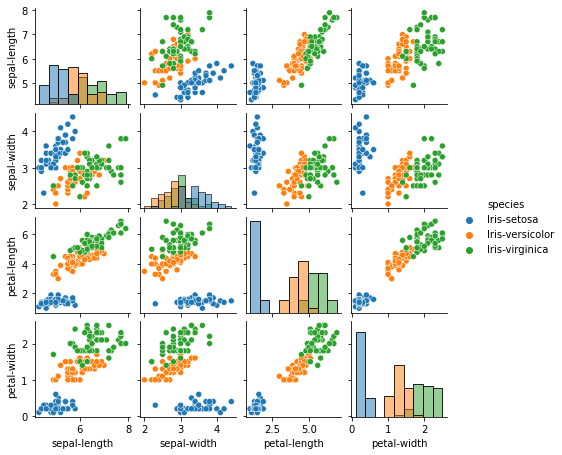

In [19]:
# pairplot with seaborn
sns.pairplot(iris, hue="species", diag_kind="hist", size=1.6);

So we are back to our original analysis, the species versicolor and virginica are very similar based on the features that we have in this dataset. There could be features of these types of iris that were not included in this datset that would produce a more clear separation between the three species. However, we need to work with the data we have.

#### Normalize our features
I did notice that our dataset is a bit unbalanced (ie. sepal-length ~4x petal-width), so we will normalize our datasset. If we didn't do this step, the features with a larger range could dominate over the others when clustering.

In [20]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,sepal-length,sepal-width,petal-length,petal-width
44,-0.900681,1.726266,-1.056944,-1.050031
81,-0.416010,-1.513375,-0.033361,-0.261193
68,0.432165,-1.976181,0.421564,0.396172
19,-0.900681,1.726266,-1.284407,-1.181504
140,1.038005,0.106445,1.047087,1.579429


#### K-Means algorithm
We are going to try clustering on the features portion of our dataset in hopes to reproduce the actual species for each iris.

We are at a bit of an advantage and know that there are 3 actual cluster, so we will just use that number. In all reality, we should test for the optimal number of clusters.

In [21]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)



KMeans(n_clusters=3, random_state=0)

#### Predict the clusters

In [22]:
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

One way to evaluate the accuracy of your model is to use silhouette scores.

<div class="alert alert-block alert-info">
<b> Silhouette score::</b> a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
</div>

In [23]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

Well, that's a bit disappointing!  Let's dig into this a bit deeper.  The score above is a mean over all the samples. There might be some clusters that were well seperated and others the are not.

#### Silhouette score
We could look at the distirbution of the silhouette scores to help determine this.

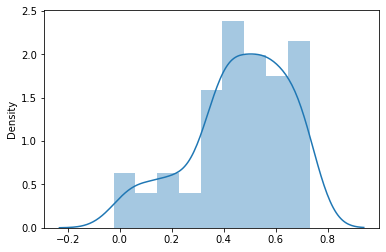

In [24]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

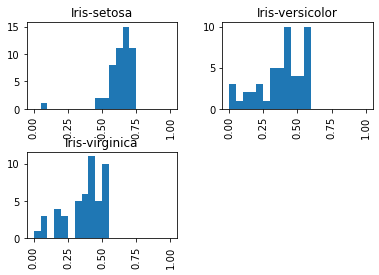

In [25]:
# add the species info to that plot?
df_scores = pd.DataFrame()
df_scores['silhouette'] = scores
df_scores['species'] = iris['species']
df_scores.hist(by='species', column='silhouette', range=(0,1.0), bins=20);

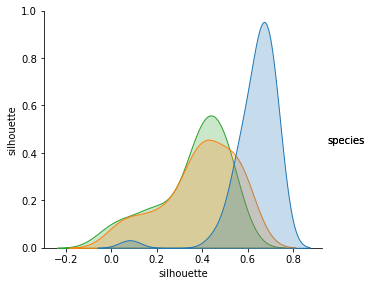

In [27]:
# all on one histogram
sns.pairplot(df_scores, hue="species", size=4).add_legend()

Based on the information for the three plots above, we can see that species of setosa was more separable in our dataset, and the other two species, versicolor and virginica, are closer together. 

Something else we could try at this point is Principal Component Analysis (PCA) to help us visualize these clusters.

#### PCA - 2d visualization of data
If you have a lot of features in your dataset, PCA can be helpful in feature reduction to avoid the curse of dimensionality (i.e. needing exponentially more data as the number of features grows to do accurate predictions). In this case, PCA remaps the data to a new (smaller) coordinate system which tries to account for the
most information possible.

We can *also* use PCA to visualize the data by reducing the features to 2 dimensions and making a scatterplot. 
You can think of this as  "mashing" the data down into 2d from the 4d we have. 

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

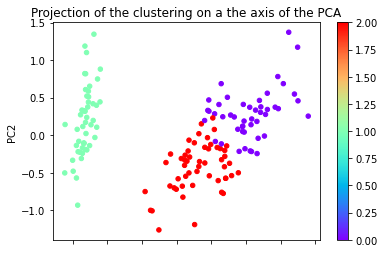

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=y_cluster_kmeans, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

So, the PCA scatterplot confirms that two of the iris clusters are not well seperated.

### Demo: Using a scree plot (aka 'elbow' plot) to find the optimal number of clusters
In our prior demo, we just used 3 as our number of clusters because we knew that the dataset had three species of iris represented. You will find that you rarely know that number of clusters within our set. 

The K-Means algorithm assumes the number of clusters as part of the input. If you do not know the number of clusters and need to determine it, you will need to run the algorithm multiple times, each time with a different number of clusters. From this, you can observe how a measure of model quality changes with the number of clusters.

Plots displaying this information help to determine the number of clusters and are often referred to as **scree plots**. The ideal plot will have an **elbow** where the quality measure improves more slowly as the number of clusters increases. This indicates that the quality of the model is no longer improving substantially as the model complexity (i.e. number of clusters) increases. In other words, the **elbow** indicates the number of clusters inherent in the data.

<img align="center" style="padding-right:10px;" src="figures_wk6/elbow_plot.png" width=550><br>

#### Import libraries

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [42]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Assign_Week6.html',
 'Assign_Week6.ipynb',
 'assign_wk6.zip',
 'breast-cancer-wisconsin.data',
 'breast-cancer-wisconsin.names',
 'data_wk6',
 'data_wk6.zip',
 'figures_wk6',
 'figures_wk6.zip',
 'Lecture_Week6-working.ipynb',
 'Lecture_Week6.html',
 'Lecture_Week6.ipynb',
 'Topic6.html',
 '__MACOSX']

Based on the information in breast-cancer-wisconsin.names file, we will assign the column names for our dataframe as follows:

|Attribute                   | Atribute range           |df column name|
|:--------------------------:|:------------------------:|:------------:|
|Sample code number          | id number                | sample       |
|Clump Thickness             | 1 - 10                   | thickness    |
|Uniformity of Cell Size     | 1 - 10                   | uc_size      |
|Uniformity of Cell Shape    | 1 - 10                   | uc_shape     |
|Marginal Adhesion           | 1 - 10                   | adhesion     |
|Single Epithelial Cell Size | 1 - 10                   | epithelial   |
|Bare Nuclei                 | 1 - 10                   | bare_nuclei  |
|Bland Chromatin             | 1 - 10                   | chromatin    |
|Normal Nucleoli             | 1 - 10                   | norm_nucleoli|
|Mitoses                     | 1 - 10                   | mitoses      |
|Class                       | benign(2) or malignant(4)| class        |

In [29]:
# Assign colum names to the dataset
names = ['sample', 'thickness', 'uc_size', 'uc_shape', 'adhesion', 'epithelial', 'bare_nuclei',
         'chromatin', 'norm_nucleoli','mitoses' 'class']

# Read dataset to pandas dataframe
cancer = pd.read_csv('data_wk6/breast-cancer-wisconsin.data', names=names) 

Before we get too far, we will drop cancer['sample'] since it is just an id for the dataset and has no meaning for our clustering.

In [30]:
cancer.drop('sample', axis=1, inplace=True)

In [31]:
cancer.shape

(699, 9)

In [32]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   thickness      699 non-null    int64 
 1   uc_size        699 non-null    int64 
 2   uc_shape       699 non-null    int64 
 3   adhesion       699 non-null    int64 
 4   epithelial     699 non-null    object
 5   bare_nuclei    699 non-null    int64 
 6   chromatin      699 non-null    int64 
 7   norm_nucleoli  699 non-null    int64 
 8   mitosesclass   699 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 54.6+ KB


#### Cleaning our dataset
We need to do something about the one categorical column that we have in our dataset.


In [43]:
# see what the range of values are in cancer.epithelial
cancer.epithelial.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [44]:
cancer.epithelial.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: epithelial, dtype: int64

Ugh!  We have missing values in our dataset. The column cancer.epithelial has 16 '?'. 

Upon further inspection, we see that there is a 58% chance that these missing values would have been a value of '1'.  I'm going to replace the missing values with a '1'.

In [45]:
# replace '?' with '1'
cancer.epithelial.replace('?',1,inplace=True)

In [46]:
# visually verify the replacement
cancer.epithelial.unique()

array(['1', '10', '2', '4', '3', '9', '7', 1, '5', '8', '6'], dtype=object)

In [47]:
# change the type of the column
cancer.epithelial = cancer.epithelial.astype(int)

In [48]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   thickness      699 non-null    int64
 1   uc_size        699 non-null    int64
 2   uc_shape       699 non-null    int64
 3   adhesion       699 non-null    int64
 4   epithelial     699 non-null    int32
 5   bare_nuclei    699 non-null    int64
 6   chromatin      699 non-null    int64
 7   norm_nucleoli  699 non-null    int64
 8   mitosesclass   699 non-null    int64
dtypes: int32(1), int64(8)
memory usage: 51.9 KB


Awesome! We have handled all the missing values and our df is all numeric at this point.

#### Split into features and labels
We will split our dataset into two groups. 

In [49]:
# split data into features (X) and labels (y)
X = cancer.iloc[:,0:9]
y = cancer.iloc[:,-1]

#### Determine the optimal number of clusters for a kmeans model
We are going to "pretend" that we don't know that the outcome of this dataset is really just k=2 clusters.

In [50]:
# Using within sum of squares to determine the optimal number of clusters for the final model. 

# import stuff
from sklearn.cluster import KMeans

# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    sum_sq.append(-model.score(X))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


[16837.59705198259,
 13838.8857638164,
 12217.567044223928,
 11334.495649547785,
 10521.843436223227,
 9810.68448807922,
 9212.63561960162,
 8760.278680570507,
 8422.508909428436,
 8206.92544027867,
 7865.974921314746,
 7622.649036900571,
 7341.238749233526,
 7170.361428093288,
 7044.685025619424,
 6857.180364373248,
 6705.867221275656,
 6587.210056413293,
 6498.03419962951,
 6319.950831394499,
 6185.8804854096525,
 6110.814130183349,
 5849.191320447362,
 5675.366208110866,
 5584.888935383594,
 5476.454414699604,
 5446.044352539541,
 5407.186701856889]

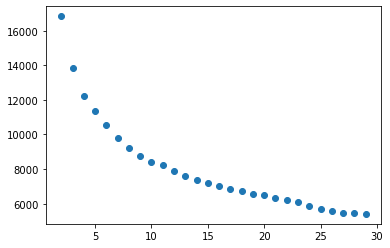

In [51]:
# make our scree plot to visually see the optimal number of clusters

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(range(2, 30), sum_sq)
np.diff(sum_sq)
sum_sq

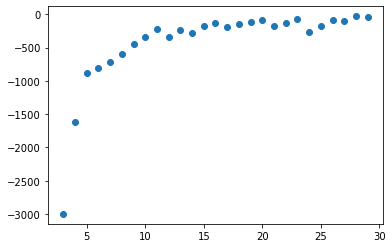

In [44]:
# compare the scree plot with a np.diff() plot

plt.scatter(range(3, 30), np.diff(sum_sq))

The above two plots can be a bit tricky to read. The first plot is the **scree** plot. From our definition above we are looking at where the measure of model quality change slows down. I can see first place this happens is around k=10. 

The second plot, np.diff(), can be used to help in the case of a judgmnet call in reading the scree plot. This plot is graphing the difference between cluster values (k).  Here we look for the first "relatively" flat spot in the graph. In the above np.diff() plot, we see out first flat spot is occurring around 12-13 clusters.

At this point it's really a judgment call on what you use. I like the looks of the scree plot better than the np.diff() plot and will go with k=10 for my number of clusters.

<div class="alert alert-block alert-warning">
<b>Note:</b> There are a wide variety of ways to determine the optimal number of clusters. I have just shown you 2 of the possiblities. The follwing articles present additional ways to accomplish finding the optimal number of k. <br>
* https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6 <br>
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html <br>
</div>

#### Rerunning with our optimal k value

In [52]:
# kmeans model with the optimal number of clusters, 10 clusters
model = KMeans(n_clusters=10, random_state=42, n_jobs=-1)
model.fit(X)

# gather the predictions
preds= model.predict(X)

#### Visualizing our clusters
We can use a silhouette score to tell us how "separated" the clusters are.  Remember this is a mean values across all of the clusters. I generally like to include a PCA visualization in addition to the silhouette score.

In [53]:
from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.22341765237866948

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

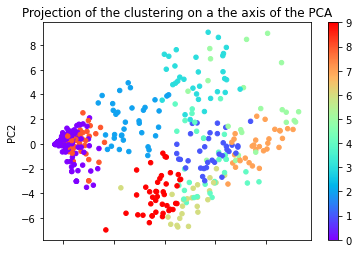

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

Hmmm... That's interesting! There really are not discernible clusters from our model. Which in all honesty, we would expect from this dataset.  We were "pretending" that we didn't know the true number of clusters. But this will give you an idea on how to find the optimal number of clusters.

Which give me an idea!  Let's see if we can use the silhouette score to help us determine the number of clusters. 

In [48]:
# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    # gather the predictions
    preds= model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.6311096884975617
Silhouette score for  3  clusters:  0.5700373598746525
Silhouette score for  4  clusters:  0.5782460415573163
Silhouette score for  5  clusters:  0.5663681350085747
Silhouette score for  6  clusters:  0.5675483399044473
Silhouette score for  7  clusters:  0.5145879207865395
Silhouette score for  8  clusters:  0.5042680420776977
Silhouette score for  9  clusters:  0.5171517228796464
Silhouette score for  10  clusters:  0.22341765237866948
Silhouette score for  11  clusters:  0.22346872082373037
Silhouette score for  12  clusters:  0.43424824303301696
Silhouette score for  13  clusters:  0.22493443014169953
Silhouette score for  14  clusters:  0.24207244471389958
Silhouette score for  15  clusters:  0.24168971820837418
Silhouette score for  16  clusters:  0.21407826859712162
Silhouette score for  17  clusters:  0.2246102383930713
Silhouette score for  18  clusters:  0.22006282218510495
Silhouette score for  19  clusters:  0.244524745

Hmmmm.... Looks like 2 clusters performed the best.  One last thing to do, visualized that in a PCA plot.

In [49]:
# kmeans model with the optimal number of clusters, 2 clusters
model = KMeans(n_clusters=2, random_state=42, n_jobs=-1)
model.fit(X)

# gather the predictions
preds= model.predict(X)

from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.6311096884975617

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

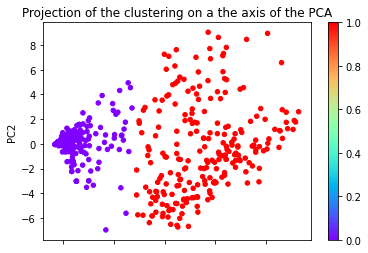

In [50]:
# visualize the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

That looks much better!

## Hierarchical Cluster Analysis (HCA)
<img align="right" style="padding-right:10px;" src="figures_wk6/dendrogram.png" width=550><br>

Hierarchical clustering analysis (HCA), also known as hierarchical cluster, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

### How HCA works
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: <br>
(1) identify the two clusters that are closest together <br>
(2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together. 

The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters.

### Measures of distance (similarity)
In the example above, the distance between two clusters has been computed based on the length of the straight line drawn from one cluster to another. This is commonly referred to as the Euclidean distance. Many other distance metrics have been developed.

**Euclidean Distance:** The shortest distance between two points. For example, if x=(a,b) and y=(c,d), the Euclidean distance between x and y is √(a−c)²+(b−d)²

**Manhattan Distance:** Imagine you were in the downtown center of a big city and you wanted to get from point A to point B. You wouldn’t be able to cut across buildings, rather you’d have to make your way by walking along the various streets. For example, if x=(a,b) and y=(c,d), the Manhattan distance between x and y is |a−c|+|b−d|

The choice of distance metric should be made based on theoretical concerns from the domain of study. That is, a distance metric needs to define similarity in a way that is sensible for the field of study. For example, if clustering crime sites in a city, **Manhattan** may be appropriate. Or, better yet, the time taken to travel between each location. Where there is no theoretical justification for an alternative, the **Euclidean** should generally be preferred, as it is usually the appropriate measure of distance in the physical world.

### Demo: Hierarchical Clustering Analysis
We will be following along with [A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/) for this section of our lecture notebook.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#### Load dataset

In [2]:
data = pd.read_csv('data_wk6/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will, of course, use Hierarchical Clustering for this problem.

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

So, let’s first normalize the data and bring all the variables to the same scale:

#### Normalize the dataset

In [3]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. 

Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

#### Dendrograms
We can use a dendrogram to visualize the history of groupings and figure out the optimal number of clusters.
Determine the largest vertical distance that doesn’t intersect any of the other clusters
Draw a horizontal line at both extremities
The optimal number of clusters is equal to the number of vertical lines going through the horizontal line.

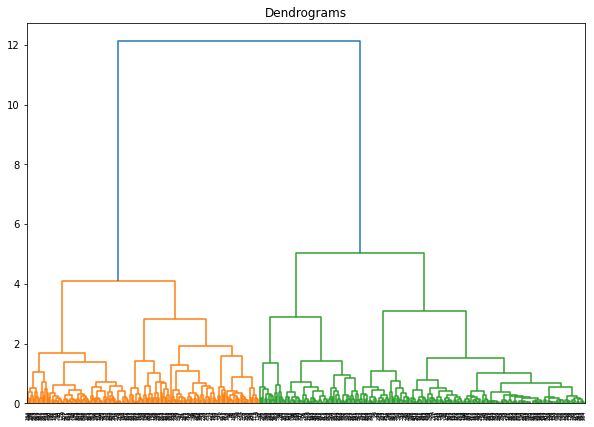

In [4]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

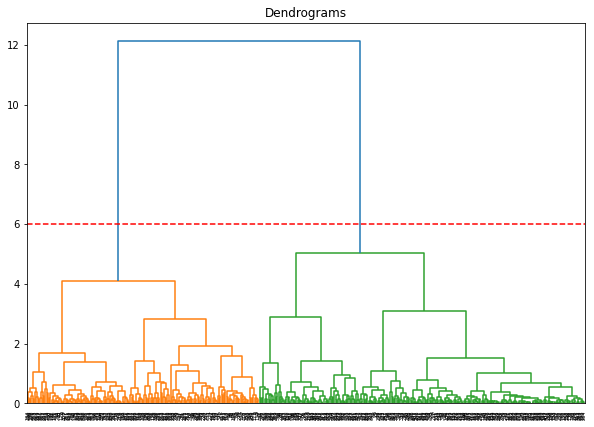

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

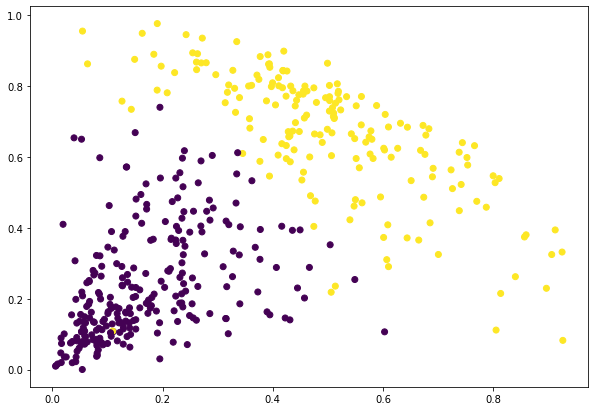

In [8]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

## Demo: Highly dimensional data
High Dimensional means that the number of dimensions are staggeringly high — so high that calculations become extremely difficult. With high dimensional data, the number of features can exceed the number of observations. For example, microarrays, which measure gene expression, can contain tens of hundreds of samples. Each sample can contain tens of thousands of genes.

We will be following along with [Visualising high-dimensional datasets using PCA and t-SNE in Python](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b) for this section of our lecture notebook.

We will use the MNIST-dataset in this write-up. There is no need to download the dataset manually as we can grab it through using Scikit Learn.

<div class="alert alert-block alert-info">
<b>Helpful Hint::</b> You might need to install sklear.datasets
</div>

In [9]:
!pip install scikit-datasets

#### Import libraries

In [11]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [12]:
# fetch the dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [13]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We are going to convert the matrix and vector to a Pandas DataFrame. This is very similar to the DataFrames used in R and will make it easier for us to plot it later on.

In [14]:
# split the dataset into features and targets
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [15]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None

print(f'Size of the dataframe: {df.shape}')


Size of the dataframe: (70000, 786)


In [16]:
df.head

<bound method NDFrame.head of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     NaN     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

In [17]:
df.pixel0.unique()

array([nan])

Because we dont want to be using 70,000 digits in some calculations we’ll take a random subset of the digits. The randomisation is important as the dataset is sorted by its label (i.e., the first seven thousand or so are zeros, etc.). To ensure randomisation we’ll create a random permutation of the number 0 to 69,999 which allows us later to select the first five or ten thousand for our calculations and visualisations.

In [18]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

We now have our dataframe and our randomisation vector. Lets first check what these numbers actually look like. To do this we’ll generate 30 plots of randomly selected images.

<Figure size 432x288 with 0 Axes>

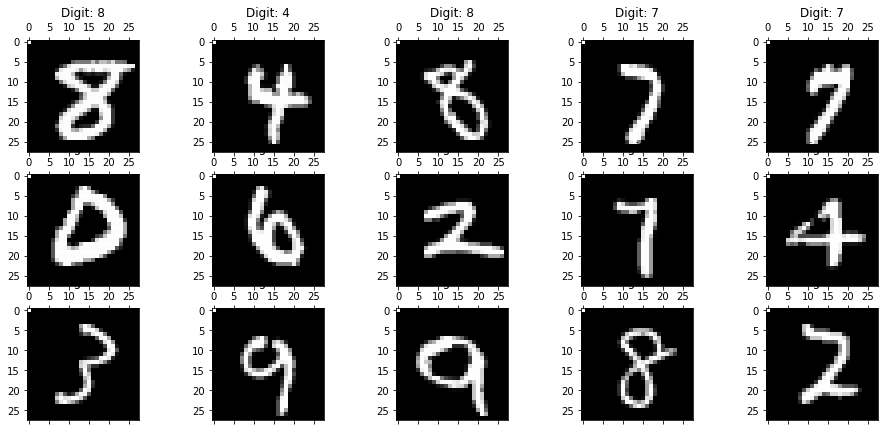

In [19]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

Now we can start thinking about how we can actually distinguish the zeros from the ones and two’s and so on. If you were, for example, a post office such an algorithm could help you read and sort the handwritten envelopes using a machine instead of having humans do that. Obviously nowadays we have very advanced methods to do this, but this dataset still provides a very good testing ground for seeing how specific methods for dimensionality reduction work and how well they work.

The images are all essentially 28-by-28 pixel images and therefore have a total of 784 ‘dimensions’, each holding the value of one specific pixel.

What we can do is reduce the number of dimensions drastically whilst trying to retain as much of the ‘variation’ in the information as possible. This is where we get to dimensionality reduction. Lets first take a look at something known as **Principal Component Analysis (PCA)**

### Dimensionality reduction using PCA
PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. It does not do this using guesswork but using hard mathematics and it uses something known as the eigenvalues and eigenvectors of the data-matrix. These eigenvectors of the covariance matrix have the property that they point along the major directions of variation in the data. These are the directions of maximum variation in a dataset.

I am not going to get into the actual derivation and calculation of the principal components — if you want to get into the mathematics see this great page — instead we’ll use the Scikit-Learn implementation of PCA.

Since we as humans like our two- and three-dimensional plots lets start with that and generate, from the original 784 dimensions, the first three principal components. And we’ll also see how much of the variation in the total dataset they actually account for.

In [31]:
#find the most common occurence
freq = df.pixel1.dropna().mode()[0]
freq

0.0

In [34]:
#fill variable with mode
df['pixel0'] = df['pixel0'].fillna(freq)

In [35]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [36]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


Now, given that the first two components account for about 25% of the variation in the entire dataset lets see if that is enough to visually set the different digits apart. What we can do is create a scatterplot of the first and second principal component and color each of the different types of digits with a different color. If we are lucky the same type of digits will be positioned (i.e., clustered) together in groups, which would mean that the first two principal components actually tell us a great deal about the specific types of digits.

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

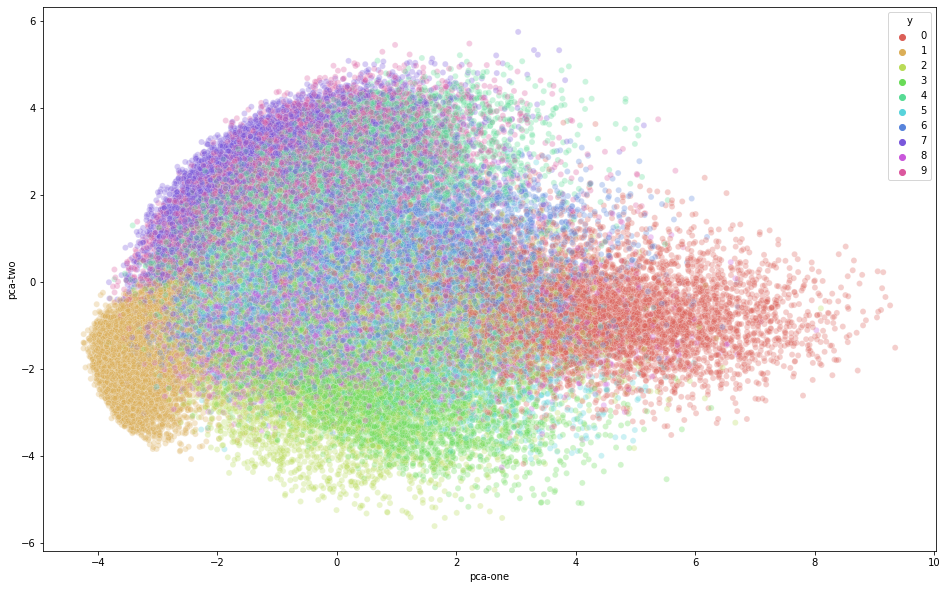

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

From the graph we can see the two components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart. Luckily there is another technique that we can use to reduce the number of dimensions that may prove more helpful. In the next few paragraphs we are going to take a look at that technique and explore if it gives us a better way of reducing the dimensions for visualisation. The method we will be exploring is known as t-SNE (t-Distributed Stochastic Neighbouring Entities).

### T-Distributed Stochastic Neighbouring Entities (t-SNE)
t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one. The original paper describes the working of t-SNE as:

>“t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.

Essentially what this means is that it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions. The way it does this is computationally quite heavy and therefore there are some (serious) limitations to the use of this technique. 

The other key drawback is that it:

>“Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements become too large)”.

We will use the Scikit-Learn Implementation of the algorithm in the remainder of this writeup.

Contrary to the recommendation above we will first try to run the algorithm on the actual dimensions of the data (784) and see how it does. To make sure we don’t burden our machine in terms of memory and power/time we will only use the first 10,000 samples to run the algorithm on. To compare later on I’ll also run the PCA again on the subset.

In [38]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


<div class="alert alert-block alert-danger">
<b>Warning::</b> The following cell can take a bit to run.  Be Patient!
</div>

In [39]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...
[t-SNE] Computed neighbors for 10000 samples in 3.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.117975
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.843964
[t-SNE] KL divergence after 300 iterations: 2.786605
t-SNE done! Time elapsed:

Now that we have the two resulting dimensions we can again visualise them by creating a scatter plot of the two dimensions and coloring each sample by its respective label.

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

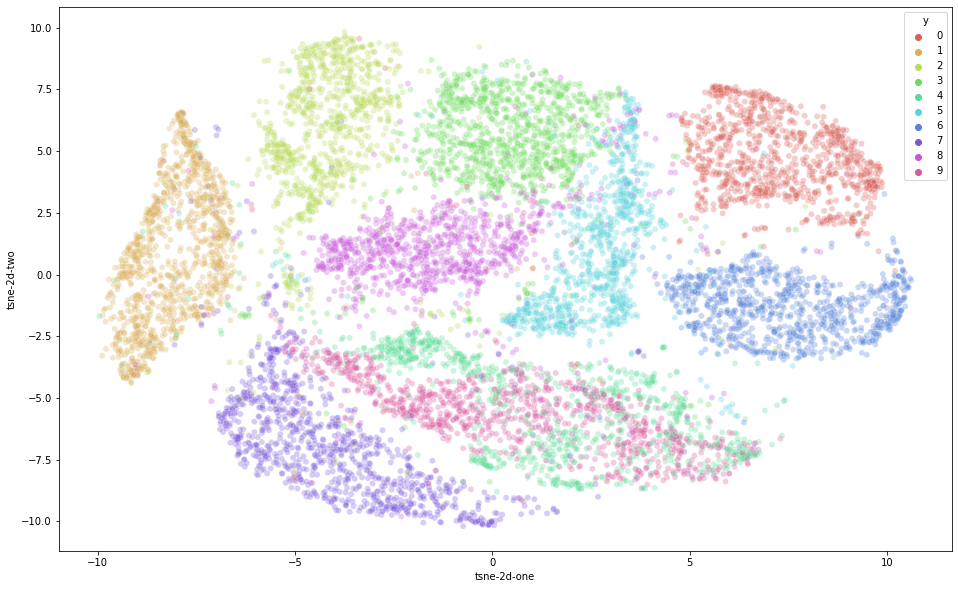

In [40]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

This is already a significant improvement over the PCA visualisation we used earlier. We can see that the digits are very clearly clustered in their own sub groups. If we would now use a clustering algorithm to pick out the seperate clusters we could probably quite accurately assign new points to a label.

Another form of highly dimensional data are graphical images. In the following example, we will see how you can use K-Means to reduce the number of "colors" represented in a graphical image.

## Demo:  Color Quantization using K-Means
This demo is based from the tutorial [Color Quantization using K-Means](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html) provided by sklearn. <br>
Special credit goes to Dr. Michael Busch for converting the original tutorial into a set of reusable UDFs.

Performs a pixel-wise Vector Quantization (VQ) of an image of a colorful parrot, reducing the number of colors required to show the image from 96,615 unique colors to 64, 8 and 3, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to find the respective color clusters. In the image processing literature, the codebook obtained from K-means (the cluster centers) is called the color palette. Using a single byte, up to 256 colors can be addressed, whereas an RGB encoding requires 3 bytes per pixel. The GIF file format, for example, uses such a palette.

#### Imports that we will need

In [41]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

from PIL import Image

%matplotlib inline

Automatically created module for IPython interactive environment


#### UDFs
To allow us to reuse  the majority of our code, we will create a few User Defined Functions (UDFs).

In [42]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves on float data (need to
# be in the range [0-1])

def to_floats(pic):
    return np.array(pic, dtype=np.float64) / 255

In [43]:
def transform2d(pic):
    original_shape = tuple(pic.shape)
    w, h, d = original_shape
    assert d == 3
    return np.reshape(pic, (w * h, d))

In [44]:
def fit_kmeans(colors, image_array):
    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=colors, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))
    return kmeans

In [45]:
# Get labels for all points
def predict_labels(kmeans, image_array):
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    return labels

In [46]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [47]:
# Load any photo into a Numpy array
image = Image.open("data_wk6/ColorfulBird.jpg")
image = np.array(image)
image.shape

(526, 800, 3)

In [48]:
image = to_floats(image)

### Color reduction with K-Means

In [49]:
image_array = transform2d(image)
kmeans64 = fit_kmeans(64, image_array)
kmeans8 = fit_kmeans(8, image_array)
kmeans3 = fit_kmeans(3, image_array)

Fitting model on a small sub-sample of the data
done in 0.381s.
Fitting model on a small sub-sample of the data
done in 0.116s.
Fitting model on a small sub-sample of the data
done in 0.070s.


In [50]:
labels64 = predict_labels(kmeans64, image_array)
labels8 = predict_labels(kmeans8, image_array)
labels3 = predict_labels(kmeans3, image_array)

Predicting color indices on the full image (k-means)
done in 0.044s.
Predicting color indices on the full image (k-means)
done in 0.018s.
Predicting color indices on the full image (k-means)
done in 0.021s.


### Displaying the new images

526 800 3


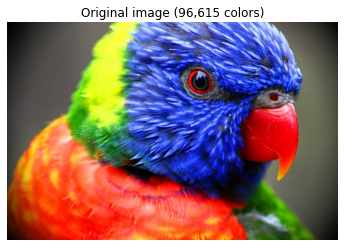

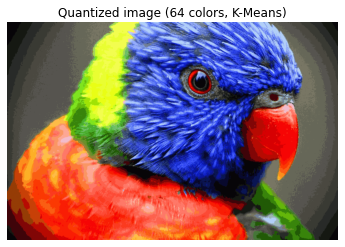

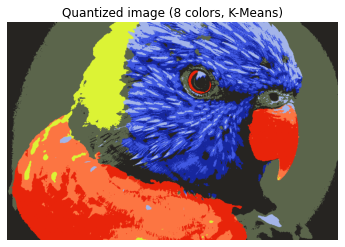

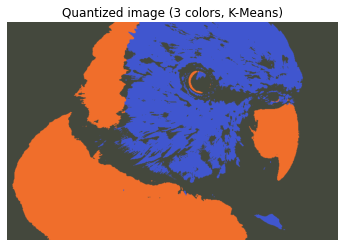

In [51]:
# display image size
w, h, d = image.shape
print(w, h, d)

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(image)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, image.shape[0], image.shape[1]))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (8 colors, K-Means)')
plt.imshow(recreate_image(kmeans8.cluster_centers_, labels8, image.shape[0], image.shape[1]))

plt.figure(4)
plt.clf()
plt.axis('off')
plt.title('Quantized image (3 colors, K-Means)')
plt.imshow(recreate_image(kmeans3.cluster_centers_, labels3, image.shape[0], image.shape[1]))

References: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/ <br>
https://www.datarobot.com/wiki/unsupervised-machine-learning/ <br>
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1 <br>
https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering <br>
https://campus.datacamp.com/courses/unsupervised-learning-in-r/unsupervised-learning-in-r?ex=9 <br>
https://www.displayr.com/what-is-hierarchical-clustering/ <br>
https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019 <br>
https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/ <br>
https://www.statisticshowto.com/dimensionality/ <br>
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b <br>
